In [1]:
!nvidia-smi

Sat Apr 17 05:31:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/tomato/train'
valid_path = '/content/drive/MyDrive/tomato/val'

In [6]:
model = InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [7]:
for layer in model.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/tomato/train/*')
folders

['/content/drive/MyDrive/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/tomato/train/Tomato___Bacterial_spot']

In [9]:
x = Flatten()(model.output)

In [10]:
outputs = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=model.inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tomato/train',target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/tomato/val',target_size = (224, 224),batch_size = 64,class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [16]:
model_data=model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
157/157 [==============================] - 2214s 14s/step - loss: 5.2952 - accuracy: 0.5051 - val_loss: 2.0849 - val_accuracy: 0.6930
Epoch 2/10
157/157 [==============================] - 119s 757ms/step - loss: 1.1592 - accuracy: 0.7727 - val_loss: 1.6021 - val_accuracy: 0.7540
Epoch 3/10
157/157 [==============================] - 118s 753ms/step - loss: 1.1107 - accuracy: 0.8109 - val_loss: 1.8368 - val_accuracy: 0.7470
Epoch 4/10
157/157 [==============================] - 119s 759ms/step - loss: 1.2485 - accuracy: 0.8134 - val_loss: 1.9633 - val_accuracy: 0.7510
Epoch 5/10
157/157 [==============================] - 119s 756ms/step - loss: 1.1134 - accuracy: 0.8310 - val_loss: 2.0506 - val_accuracy: 0.7670
Epoch 6/10
157/157 [==============================] - 119s 757ms/step - loss: 0.9452 - accuracy: 0.8606 - val_loss: 1.6240 - val_accuracy: 0.8050
Epoch 7/10
157/157 [==============================] - 119s 759ms/step - loss: 0.9046 - accuracy: 0.8700 - val_loss: 1.5196 - 

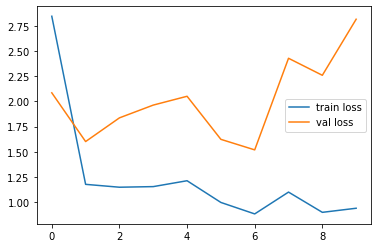

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(model_data.history['loss'], label='train loss')
plt.plot(model_data.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

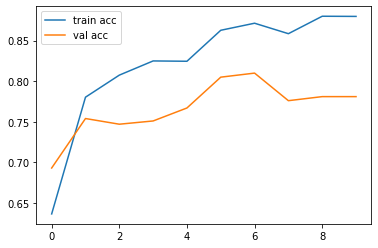

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(model_data.history['accuracy'], label='train acc')
plt.plot(model_data.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
result =model.evaluate(test_set)
dict(zip(model.metrics_names, result))

16/16 [==============================] - 3s 199ms/step - loss: 2.8139 - accuracy: 0.7810


{'accuracy': 0.781000018119812, 'loss': 2.813875436782837}

In [24]:
loss, accuracy = model.evaluate(test_set, verbose=2)
print('loss: %.2f' % (loss),'Accuracy: %.2f' % (accuracy*100))

16/16 - 3s - loss: 2.8139 - accuracy: 0.7810
loss: 2.81 Accuracy: 78.10


In [22]:
model.save('model_inception.h5')

In [25]:
y_pred = model.predict(test_set)
y_pred

array([[8.1984798e-26, 0.0000000e+00, 4.5418443e-36, ..., 1.0000000e+00,
        2.4916187e-24, 1.1782457e-33],
       [4.1760935e-12, 1.9879545e-13, 1.6331689e-19, ..., 8.9428946e-14,
        4.3638252e-18, 0.0000000e+00],
       [1.1271941e-14, 2.7562766e-15, 4.1131066e-17, ..., 1.0543828e-28,
        2.3860859e-23, 1.5025358e-20],
       ...,
       [3.9473597e-32, 4.9956030e-18, 0.0000000e+00, ..., 1.9908538e-26,
        1.3975530e-20, 5.1360455e-18],
       [9.4304686e-23, 1.7396731e-27, 1.0000000e+00, ..., 7.4129503e-20,
        6.9750255e-32, 4.7070711e-35],
       [1.0000000e+00, 4.4508901e-13, 2.8281096e-29, ..., 1.4231547e-20,
        9.9145817e-37, 0.0000000e+00]], dtype=float32)

In [29]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 3, 6, 3, 6, 9, 0, 1, 4, 0, 7, 0, 1, 3, 9, 0, 5, 4, 3, 5, 4, 2,
       5, 8, 6, 9, 2, 2, 0, 8, 1, 9, 8, 3, 4, 0, 2, 9, 6, 9, 4, 8, 6, 6,
       3, 9, 6, 5, 3, 7, 0, 5, 1, 0, 5, 9, 6, 8, 5, 6, 2, 8, 7, 4, 4, 6,
       6, 4, 2, 2, 3, 0, 6, 6, 9, 2, 4, 0, 0, 4, 8, 7, 3, 9, 1, 3, 6, 6,
       4, 8, 2, 4, 3, 8, 8, 5, 8, 5, 6, 8, 8, 9, 6, 8, 4, 4, 0, 8, 7, 2,
       8, 3, 6, 3, 0, 3, 4, 1, 8, 2, 4, 5, 3, 1, 0, 9, 2, 9, 1, 0, 4, 9,
       0, 1, 3, 5, 5, 7, 8, 6, 4, 1, 7, 5, 6, 0, 4, 0, 0, 6, 3, 6, 2, 4,
       5, 5, 7, 3, 1, 2, 6, 4, 3, 2, 8, 6, 3, 7, 2, 5, 5, 2, 2, 0, 3, 3,
       6, 2, 6, 1, 7, 3, 3, 0, 4, 0, 7, 7, 8, 5, 3, 1, 4, 0, 6, 0, 8, 5,
       8, 3, 3, 4, 5, 0, 4, 5, 4, 0, 4, 5, 8, 5, 1, 2, 8, 3, 1, 5, 6, 9,
       3, 2, 4, 3, 9, 6, 5, 8, 2, 6, 3, 9, 3, 9, 2, 7, 1, 0, 0, 4, 7, 1,
       6, 2, 9, 3, 2, 8, 6, 0, 9, 5, 5, 9, 2, 8, 6, 6, 5, 6, 6, 5, 3, 6,
       4, 3, 3, 6, 3, 7, 8, 3, 0, 3, 7, 6, 3, 5, 2, 0, 4, 3, 4, 0, 6, 0,
       2, 8, 5, 4, 7, 8, 4, 1, 4, 6, 9, 0, 4, 9, 9,